In [2]:
#sciezka z danymi
%cd "C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino"

C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\wino


In [88]:
from sklearn.metrics import *
import pickle
import matplotlib.pyplot as plt
#wlasny modul
from dane.dane_wsadowe_zmiana_klas import *

**1. Pobranie modeli**

In [4]:
#random forrest
with open("modele/model_final_rf.pkl", "rb") as file:
    model_rf = pickle.load(file)

In [5]:
#XGboost
with open("modele/model_final_xgb.pkl", "rb") as file:
    model_xgb = pickle.load(file)

**2. Trenowanie wszystkich modeli**

In [83]:
lista_modeli = [model_rf, model_xgb]

#progi na ktorych dzialaja najlepiej
progi = {"RandomForestClassifier" : 0.45862068965517244,
        "XGBClassifier" : 0.3206896551724138}

#jakie zbiory wykorzystalismy do trenowania
zbior = {"RandomForestClassifier" : X_test,
        "XGBClassifier" :X_test_scaled}


In [82]:
for i in lista_modeli:
    prog = progi[type(i).__name__]
    dane = zbior[type(i).__name__]
    Y_pred_model = (i.predict_proba(dane)[:,1] >= prog).astype(int)+1
    cnf_matrix = confusion_matrix(Y_test, Y_pred_model)
    cnf_raport = classification_report(Y_test, Y_pred_model)
    print(type(i).__name__, "\n", cnf_raport)    

RandomForestClassifier 
               precision    recall  f1-score   support

           1       0.96      0.91      0.93       280
           2       0.53      0.70      0.60        40

    accuracy                           0.88       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.90      0.88      0.89       320

XGBClassifier 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       280
           2       0.66      0.62      0.64        40

    accuracy                           0.91       320
   macro avg       0.80      0.79      0.80       320
weighted avg       0.91      0.91      0.91       320



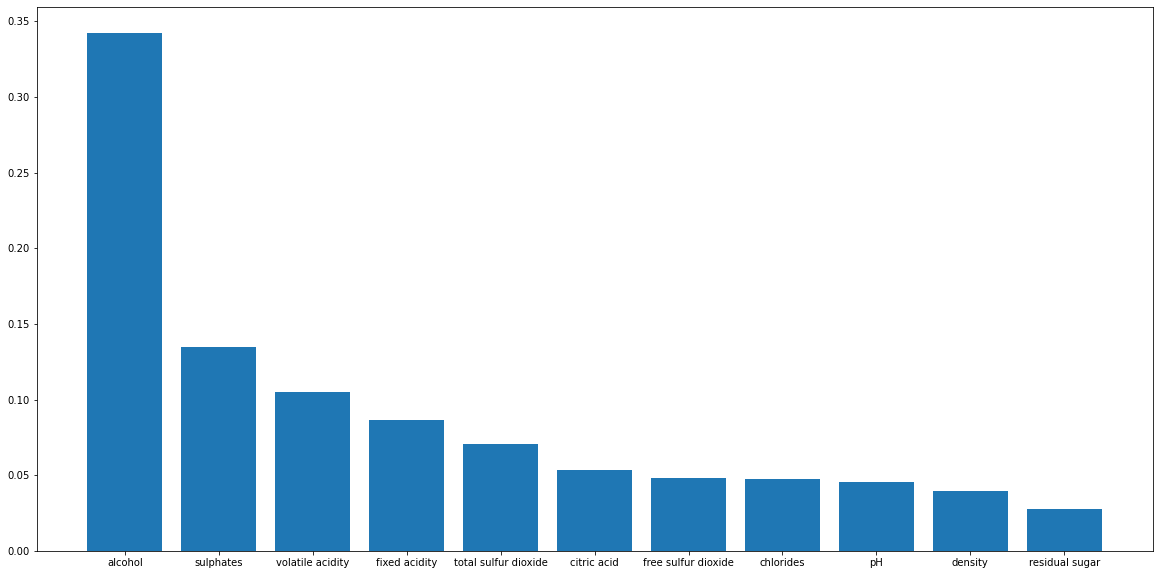

                zmienna   wartosc
6   free sulfur dioxide  0.047959
7             chlorides  0.047355
8                    pH  0.045265
9               density  0.039325
10       residual sugar  0.027714


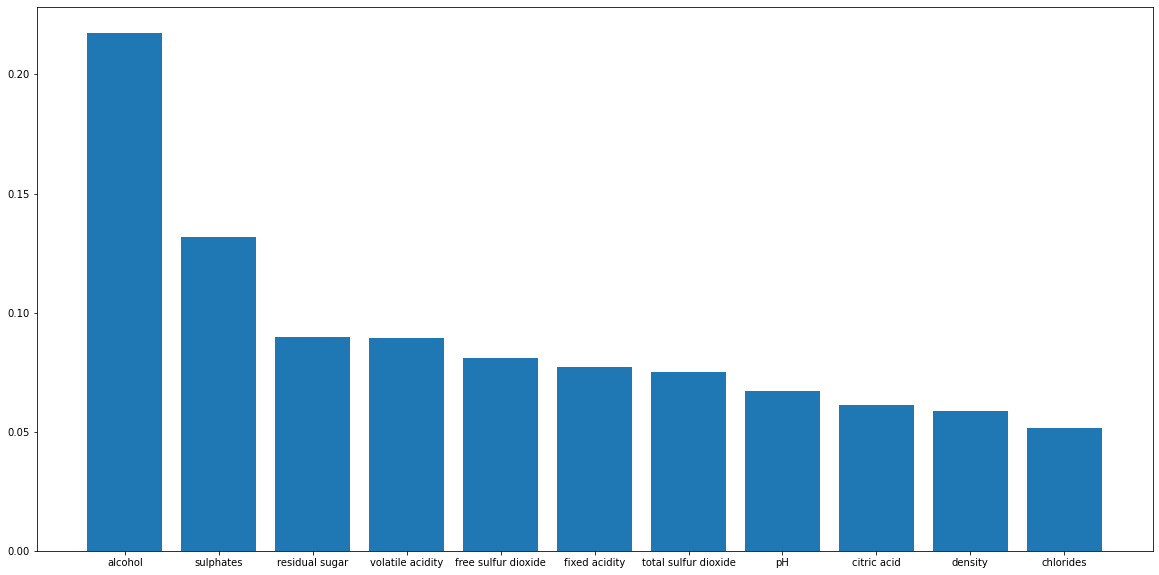

Empty DataFrame
Columns: [zmienna, wartosc]
Index: []


In [146]:
#sprawdzmy jakie zmienne sa najmniej istotne do przewidywania modelu i je mozemy pominac przy narzedziu
for i in lista_modeli:
    df = pd.DataFrame({"zmienna" :X.columns,"wartosc" : i.feature_importances_ }).sort_values(by = "wartosc", ascending = False).reset_index(drop = True)
    plt.figure(figsize=(20,10))
    plt.bar(df.zmienna, df.wartosc)
    plt.show()
    print(df[df.wartosc<0.05])

In [117]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [119]:
i.feature_importances_

array([0.07715453, 0.08954789, 0.06116929, 0.08991916, 0.0515771 ,
       0.08081891, 0.07487553, 0.058752  , 0.06718756, 0.13162771,
       0.21737032], dtype=float32)

In [131]:
pd.DataFrame({"zmienna" :X.columns,"wartosc" : i.feature_importances_ }).sort_values(by = "wartosc", ascending = False)

,zmienna,wartosc
10,alcohol,0.217370
9,sulphates,0.131628
3,residual sugar,0.089919
1,volatile acidity,0.089548
5,free sulfur dioxide,0.080819
0,fixed acidity,0.077155
6,total sulfur dioxide,0.074876
8,pH,0.067188
2,citric acid,0.061169
7,density,0.058752
